In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
df = pd.read_csv('Breast_Cancer.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [56]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
df.drop('Unnamed: 32',axis=1 , inplace=True)

In [58]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
df['diagnosis'] = [ 1 if i == 'M' else 0 for i in df.diagnosis]

In [70]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [61]:
x = df.drop('diagnosis',axis=1 )
y = df['diagnosis']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [63]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_val = scale.transform(x_val)
x_test = scale.transform(x_test)

In [64]:
LR_model = LogisticRegression()

In [65]:
LR_model.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred = LR_model.predict(x_test)

In [72]:
LR_score = accuracy_score(y_pred,y_test)
print(LR_score)

0.9736842105263158


In [73]:
DTC = DecisionTreeClassifier()

In [74]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [75]:
grid = GridSearchCV(
    estimator=DTC,
    param_grid=params,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [78]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [79]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=43, min_samples_split=3)

In [80]:
DTC = DecisionTreeClassifier(max_leaf_nodes=43,min_samples_split=3)

In [81]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=43, min_samples_split=3)

In [82]:
y_pred = DTC.predict(x_test)
DTC_score = accuracy_score(y_pred,y_test)
print(DTC_score)

0.9298245614035088


In [83]:
KNN = KNeighborsClassifier()

In [84]:
params = {'n_neighbors': list(range(1,31))}

In [86]:
grid = GridSearchCV(
    estimator= KNN,
    param_grid=params,
    scoring='accuracy',
    n_jobs= -1,
    cv = 5
)

In [87]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [88]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [89]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
KNN_score = accuracy_score(y_pred,y_test)
print(KNN_score)

0.9473684210526315


In [90]:
model = SVC()

In [91]:
param_distributions = {
  'C':  [0.1, 1, 10],
  'kernel': ['linear', 'rbf'],
  'gamma': ['scale', 'auto']
}

In [92]:
grid = GridSearchCV(
    estimator= model,
    param_grid=param_distributions,
    scoring='accuracy',
    cv = 5,
    n_jobs= -1
)

In [93]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [94]:
grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [97]:
model = SVC(C=0.1,kernel='linear')

In [98]:
model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [99]:
y_pred = model.predict(x_test)
SVC_score = accuracy_score(y_pred,y_test)
print(SVC_score)

0.9736842105263158


In [100]:
models_names=['Logitic','KNN','SVC','TREE']
models_scores = [LR_score,KNN_score,SVC_score,DTC_score]


<Axes: >

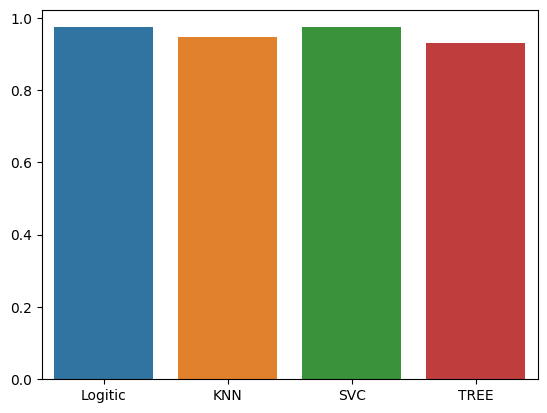

In [104]:
sns.barplot(x=models_names,y=models_scores)